In [10]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from langchain_groq import ChatGroq
from langchain_core.messages import BaseMessage,HumanMessage
from dotenv import load_dotenv
load_dotenv()


True

In [11]:
model= ChatGroq(
model="llama-3.3-70b-versatile",
temperature=0.5
)

In [12]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages:Annotated[list[BaseMessage],add_messages]


def chat(state: ChatState):
    messages=state["messages"]
    response=model.invoke(messages)
    return {"messages":[response]}

In [13]:
from langgraph.checkpoint.memory import MemorySaver

checkpoint=MemorySaver() # THIS SAVES CHAT IN MEMORY FOR THE TIME BEING

graph=StateGraph(ChatState)

graph.add_node("chat",chat)

graph.add_edge(START,"chat")

workflow=graph.compile(checkpointer=checkpoint) # we are compiling the workflow with a checkpoint

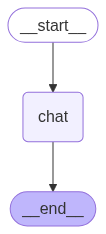

In [14]:
workflow

In [15]:
thread_id="1"

while True:

    user_message=input("You: ")
    print("User: ",user_message)

    if user_message.lower() == "exit":
        break
    initial_state={
        "messages":[HumanMessage(content=user_message)]
    }
    config={
        "configurable":{"thread_id":thread_id}
    } # without thread you get this ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id
    llm_message=workflow.invoke(initial_state, config=config)
    print("Bot: ",llm_message["messages"][-1].content)

User:  Hello I am Isfar
Bot:  Hello Isfar, it's nice to meet you. Is there something I can help you with or would you like to chat?
User:  What is my name?
Bot:  Your name is Isfar.
User:  exit


In [16]:
llm_message

{'messages': [HumanMessage(content='Hello I am Isfar', additional_kwargs={}, response_metadata={}, id='d1613688-4311-48a9-82fa-81a6e6d86e51'),
  AIMessage(content="Hello Isfar, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 40, 'total_tokens': 67, 'completion_time': 0.041827892, 'prompt_time': 0.010532524, 'queue_time': 0.048132866, 'total_time': 0.052360416}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--da974aed-a9db-4664-885d-c4f2b99f4711-0', usage_metadata={'input_tokens': 40, 'output_tokens': 27, 'total_tokens': 67}),
  HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='c0aa792a-b226-414b-938e-6dec0431082b'),
  AIMessage(content='Your name is Isfar.', additional_kwargs={}, response_metadat

In [18]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hello I am Isfar', additional_kwargs={}, response_metadata={}, id='d1613688-4311-48a9-82fa-81a6e6d86e51'), AIMessage(content="Hello Isfar, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 40, 'total_tokens': 67, 'completion_time': 0.041827892, 'prompt_time': 0.010532524, 'queue_time': 0.048132866, 'total_time': 0.052360416}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--da974aed-a9db-4664-885d-c4f2b99f4711-0', usage_metadata={'input_tokens': 40, 'output_tokens': 27, 'total_tokens': 67}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='c0aa792a-b226-414b-938e-6dec0431082b'), AIMessage(content='Your name is Isfar.', additional_kwargs={}, r